In [13]:
import pandas as pd

df = pd.read_csv('big_commits_with_rectifier.csv')
# print(df.head(1))
df.head(25)['LLM Inference']


0                           Deadlock / livelock
1     Exception handling / swallowed exceptions
2                        Performance regression
3              Documentation / comment mismatch
4     Exception handling / swallowed exceptions
5                            Index out of range
6                     Encoding / formatting bug
7                       Localization / i18n bug
8              Incorrect default / config value
9               Boundary condition / off-by-one
10             Feature flag / config toggle bug
11                Dependency / version mismatch
12            Security - injection / XSS / SQLi
13             Incorrect default / config value
14              Boundary condition / off-by-one
15                           Null/None handling
16              Incorrect caching / stale cache
17             Incorrect default / config value
18              Boundary condition / off-by-one
19                           Null/None handling
20    Exception handling / swallowed exc

In [14]:
print("--- Baseline Descriptive Statistics ---")


--- Baseline Descriptive Statistics ---


In [15]:
total_commits = df['Hash'].nunique()
total_files = df['Filename'].nunique()
print("Q1: Total number of commits and files.")

print(f"\nTotal number of unique commits: {total_commits}")
print(f"Total number of unique files: {total_files}")

Q1: Total number of commits and files.

Total number of unique commits: 22
Total number of unique files: 29


In [16]:
files_per_commit = df.groupby('Hash')['Filename'].count()
avg_files_per_commit = files_per_commit.mean()
print("Q2: Average number of modified files per commit.")
print(f"\nAverage number of modified files per commit: {avg_files_per_commit:.2f}")

Q2: Average number of modified files per commit.

Average number of modified files per commit: 2.09


Q3: Distribution of fix types from LLM Inference (fix type).

Distribution of fix types:


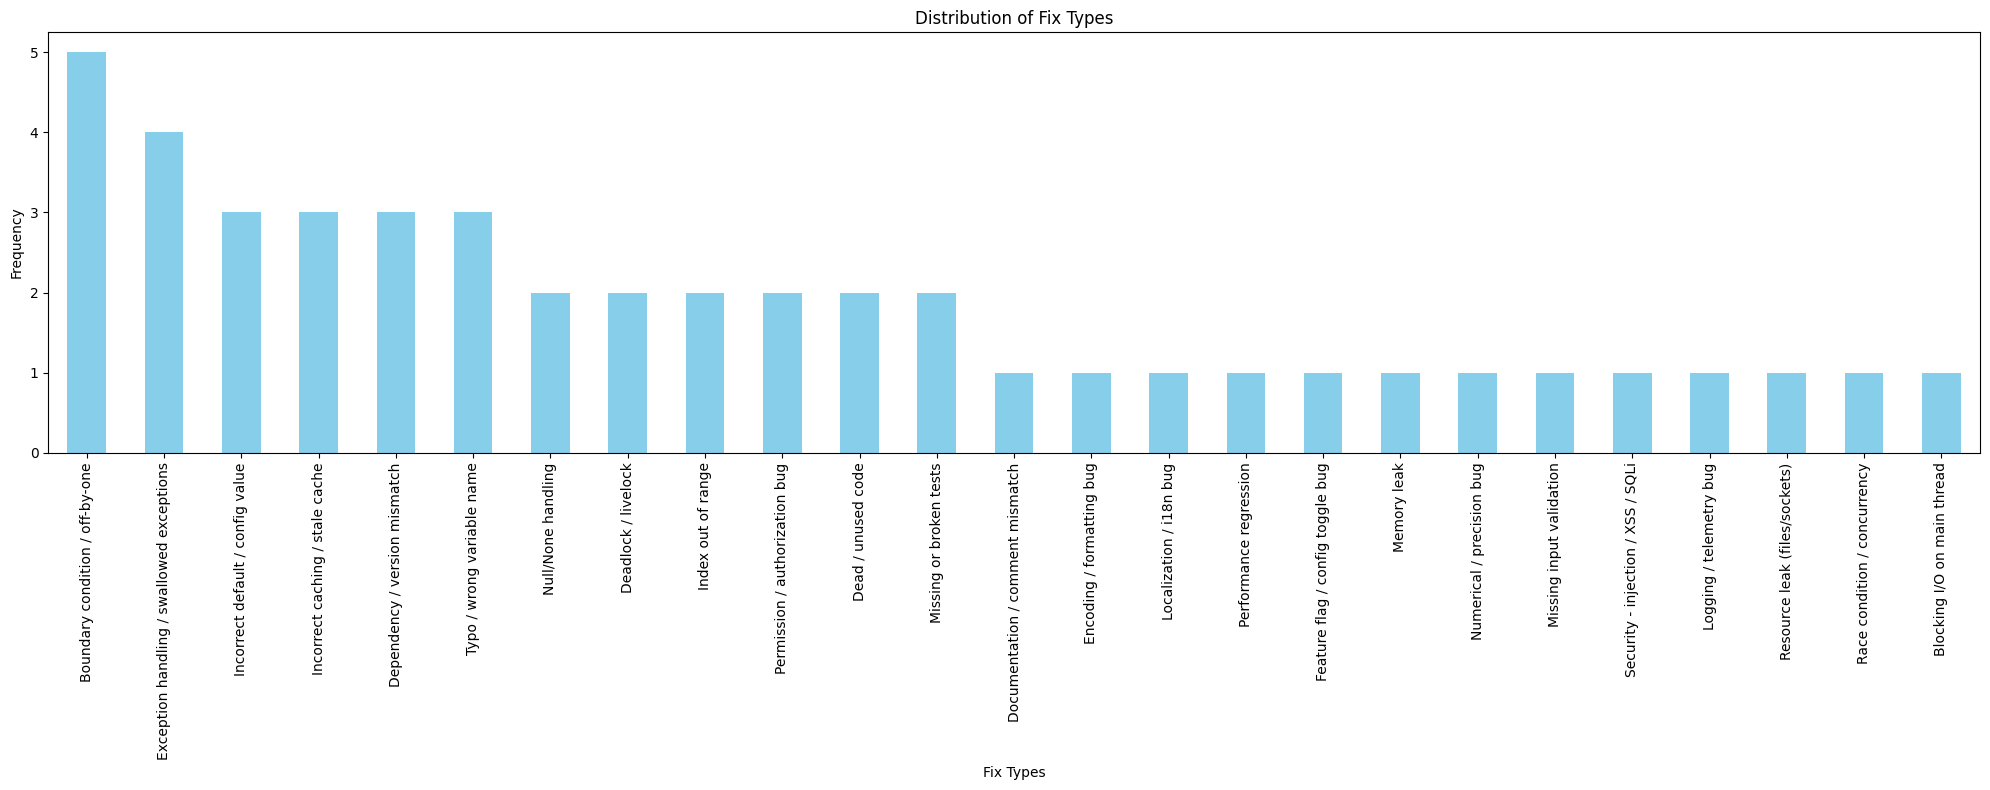

In [25]:
fix_type_distribution = df['LLM Inference'].value_counts()

print("Q3: Distribution of fix types from LLM Inference (fix type).")
print("\nDistribution of fix types:")
# plot graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
fix_type_distribution.plot(kind='bar', color='skyblue')
plt.title("Distribution of Fix Types")
plt.xlabel("Fix Types")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [26]:
top_modified_files = df['Filename'].value_counts().head(5) # Get top 5

print("Q4: Most frequently modified filenames/extensions.")
print("\nTop 5 most frequently modified files:")
print(top_modified_files)


Q4: Most frequently modified filenames/extensions.

Top 5 most frequently modified files:
Filename
jax/lax.py                 5
jax/numpy/lax_numpy.py     5
tests/lax_numpy_test.py    4
jax/test_util.py           3
jax/api.py                 2
Name: count, dtype: int64


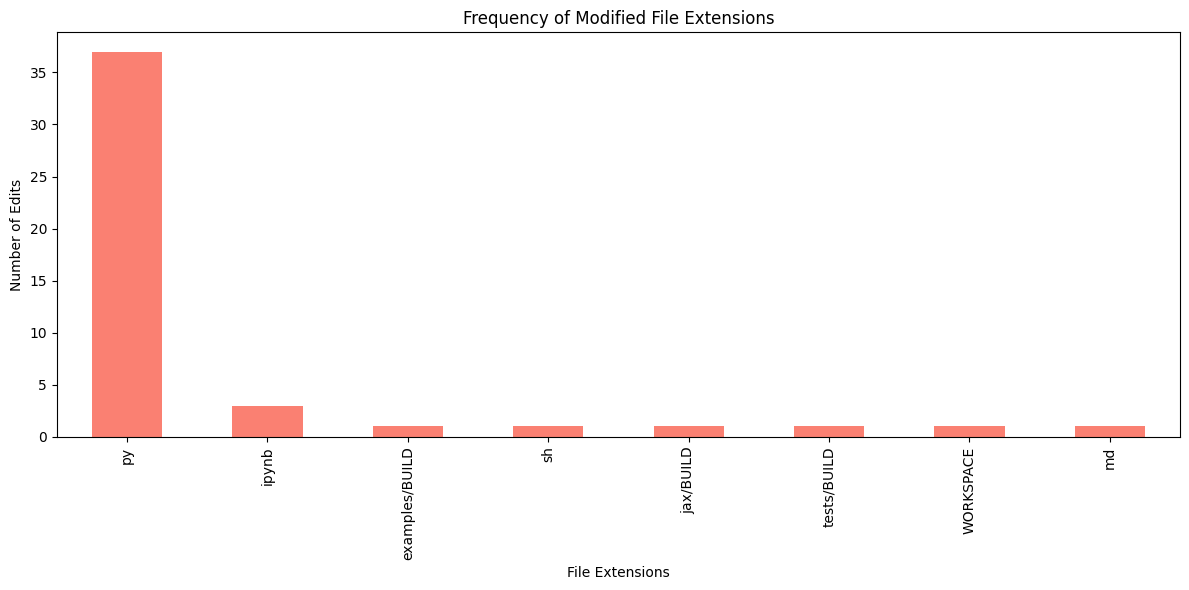

In [27]:
df['Extension'] = df['Filename'].str.split('.').str[-1]
top_extensions = df['Extension'].value_counts()

plt.figure(figsize=(12, 6))

top_extensions.plot(kind='bar', color='salmon')
plt.title("Frequency of Modified File Extensions")
plt.xlabel("File Extensions")
plt.ylabel("Number of Edits")

plt.tight_layout()
plt.show()

In [28]:
df.columns

Index(['Hash', 'Message', 'Filename', 'Source Code (before)',
       'Source Code (current)', 'Diff', 'LLM Inference', 'Rectifier',
       'Extension'],
      dtype='object')